## Content analysis

In [1]:
import pandas as pd
import re

DATAFILE = "nunl-comments3.csv"
DATE = "date"

df = pd.read_csv(DATAFILE,index_col="id")
for i in df.index.values:
    date = re.sub(r",.*$","",df.loc[i][DATE])
    month,day,year = date.split("/")
    month = month.zfill(2)
    day = day.zfill(2)
    df.loc[i][DATE] = year+month+day
df

,name,date,text,parent
id,,,,
3ccc13b3-d1b5-409d-bc7c-e233ae3524a4,Popeye_xl,20200404,"Onzin, dus mondkapjes werken wel in de ziekenh...",3dd2894c-f443-4097-8605-9573748dea90
f29d5e9f-29c9-4c55-9e96-0e742a5021da,Milanevic,20200404,Dat het niet beschermd dat je word besmet klop...,1d18b602-7ee6-4dff-b92d-c0549bb28947
07c65bf4-c1e1-4907-8b14-1fa8865e6d03,ilovejb,20200404,Ik vermoed omdat er een groot tekort aan mondk...,446eb98f-2e98-4b78-a6ab-6ece7a4a158f
5e45326d-9e79-4110-9a68-1004946a72a1,Suuuzzy,20200404,Dat ik heb de overheid een paar keer horen zeg...,51398b4f-41c6-400c-bf29-3c8c3ca71720
ab98306d-f5cd-4925-af52-386ba0aaebbf,IkBenThomas,20200404,Er is gewoon wereldwijd een tekort aan mondkap...,01500981-3b4c-4134-99c7-e17967e9662f
...,...,...,...,...
eeb324f8-72a9-43fa-b90e-ac16797b2a20,Welkenaamisdanweloke,20200403,Zoals eerder vermeld. Dat beleid is gericht op...,1e307ca4-704c-4cf4-be67-c3cdcd73ebec
029f7035-99b2-46e8-9385-830cc28be1ef,RatuAdil,20200403,Nee dat beleid is niet enkel daar op gericht.,b867aefe-5fbf-4e35-9937-80578f956b14
15cde194-cf6e-4259-94f8-8de97ff56cdf,RatuAdil,20200403,Het is zelfs zo dat onjuist gebruik van dergel...,59e137d1-8e4d-4168-b3d1-ff4e6bc6bb36


In [2]:
ANNOTATIONFILE = "human-labels.txt"

inFile = open(ANNOTATIONFILE,"r")
annotations = {}
minutes = {}
for line in inFile:
    (userName,date,tweetId,nbr,label) = line.strip().split()
    annotations[tweetId] = label
    minutes[date[0:12]] = True
inFile.close()

print("annotation time: {0:d} minutes ({1:0.1f} tweets per minute)".\
      format(len(minutes),round(len(annotations)/len(minutes),1)))

annotation time: 235 minutes (3.2 tweets per minute)


In [3]:
IRRELEVANT = "IRRELEVANT"
NEUTRAL = "NEUTRAL"
SUPPORTS = "SUPPORTS"
REJECTS = "REJECTS"
ID = "id"

labelsPerDate = {}
totals = {}
for textId in df.index.values:
    if textId in annotations and annotations[textId] != IRRELEVANT:
        date = df.loc[textId][DATE]
        label = annotations[textId]
        if not date in labelsPerDate: labelsPerDate[date] = {}
        labelsPerDate[date][label] = labelsPerDate[date][label]+1 if label in labelsPerDate[date] else 1
        totals[label] = totals[label]+1 if label in totals else 1
labelsPerDate

{'20200404': {'REJECTS': 16, 'NEUTRAL': 6, 'SUPPORTS': 15},
 '20200403': {'REJECTS': 265, 'NEUTRAL': 47, 'SUPPORTS': 168}}

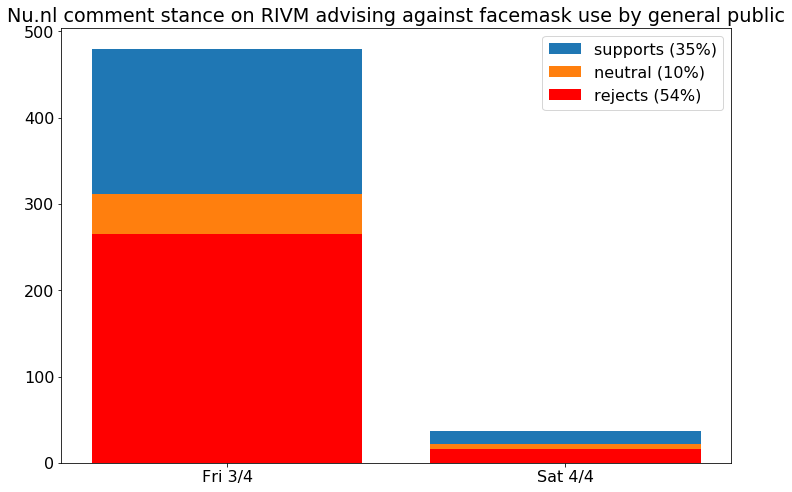

In [5]:
import matplotlib
import matplotlib.pyplot as plt

REJECTS = "REJECTS"
SUPPORTS = "SUPPORTS"
NEUTRAL = "NEUTRAL"

labels = {"REJECTS":"rejects","SUPPORTS":"supports","NEUTRAL":"neutral"}
percentages = {key:round(100*totals[key]/sum(totals.values())) for key in totals}
font = {"size":16}
matplotlib.rc("font",**font)

for date in labelsPerDate:
    for label in [REJECTS,NEUTRAL,SUPPORTS]:
        if not label in labelsPerDate[date]:
            labelsPerDate[date][label] = 0

negative = [labelsPerDate[date][REJECTS] for date in sorted(labelsPerDate.keys())]
neutral = [labelsPerDate[date][NEUTRAL] for date in sorted(labelsPerDate.keys())]
positive = [labelsPerDate[date][SUPPORTS] for date in sorted(labelsPerDate.keys())]
negplusneu = [negative[i]+neutral[i] for i in range(0,len(neutral))]
plt.figure(figsize=(12,8))
plt.bar(list(sorted(labelsPerDate.keys())),positive,label=labels[SUPPORTS]+" ("+str(percentages[SUPPORTS])+"%)",bottom=negplusneu)
plt.bar(list(sorted(labelsPerDate.keys())),neutral,label=labels[NEUTRAL]+" ("+str(percentages[NEUTRAL])+"%)",bottom=negative)
plt.bar(list(sorted(labelsPerDate.keys())),negative,label=labels[REJECTS]+" ("+str(percentages[REJECTS])+"%)",color="r")
plt.title("Nu.nl comment stance on RIVM advising against facemask use by general public")
plt.xticks(list(sorted(labelsPerDate.keys())),["Fri 3/4","Sat 4/4"])
plt.legend()
plt.show()

In [20]:
import numpy as np

users,counts = np.unique(df["name"],return_counts=True)
combined = [(users[i],counts[i]) for i in range(0,len(users))]
sorted(combined,key=lambda x:x[1],reverse=True)

[('HarryDavidson', 27),
 ('Jasper_Hillebrand', 24),
 ('moje', 22),
 ('Vlierbes', 20),
 ('Huup', 16),
 ('jannne', 16),
 ('LFL_L', 15),
 ('Astrid', 11),
 ('RatuAdil', 11),
 ('Miep_Kraak_dfdcdf', 10),
 ('Brousant', 9),
 ('Mmroos', 9),
 ('Arnold_Leen', 8),
 ('DeBioloog', 8),
 ('Droog', 8),
 ('Marc2', 8),
 ('NiMa', 8),
 ('PSV_BER', 8),
 ('Vrouwvan29', 8),
 ('arjan_petersen', 8),
 ('ligfries', 8),
 ('Dragonheart', 7),
 ('Moccona', 7),
 ('Ramana', 7),
 ('Bram_Ovic', 6),
 ('Erwin1129', 6),
 ('Grisso', 6),
 ('Hans_NL', 6),
 ('IkBenThomas', 6),
 ('Ma_Di', 6),
 ('Ahaa', 5),
 ('Behave', 5),
 ('Ekmekvarme', 5),
 ('Met_stomheid_geslagen', 5),
 ('Michiel_de_B', 5),
 ('R_Synthus', 5),
 ('Roaringlion', 5),
 ('Suuuzzy', 5),
 ('nuik12345', 5),
 ('radioman', 5),
 ('Be_Pa', 4),
 ('Bertie_P', 4),
 ('Cor83', 4),
 ('Dick_Pelle', 4),
 ('GeenRedactie', 4),
 ('J_Vlerken', 4),
 ('JayLoo', 4),
 ('Kees78', 4),
 ('Mariska_B_cbccad', 4),
 ('Milanevic', 4),
 ('Uhh_Duhh', 4),
 ('Welkenaamisdanweloke', 4),
 ('michielvdm